In [434]:
clear()

In [435]:
import os
os.getcwd()
os.chdir('C:\\Users\\benha\\Box\\Masters Project - Tetra Tech\\Final')
import pandas as pd
import datetime
import numpy as np

In [302]:
#df=pd.read_csv('tweets_daily_final.csv', parse_dates=["time"])

In [23]:
#df['year'] = pd.DatetimeIndex(df['time']).year
#df['month']= pd.DatetimeIndex(df['time']).month
#df['day']= pd.DatetimeIndex(df['time']).day

In [436]:
data=pd.read_excel("Summary.xlsx",sheet_name="Tweets", parse_dates=['time'])
#data=data.rename(columns={"Water quality or not?": "water", "Positive or negative?":"pos"})
data=data.sort_values(by=['time'], ignore_index=True)
data

,tweet,time,Water quality or not?,Positive or negative?
0,A 12 year old just asked me to buy alcohol the...,2016-01-01,0,NaN
1,"Kevin Going, 28, from Payson, called 911 from ...",2016-01-03,0,NaN
2,RT @FromNone2Won: Preparing for an epic winter...,2016-01-05,0,NaN
3,Preparing for an epic winter run tomorrow - Ac...,2016-01-05,0,NaN
4,RT @FromNone2Won: Preparing for an epic winter...,2016-01-05,0,NaN
...,...,...,...,...
2690,me: *drop kicks my brain into utah lake*\nme: ...,2020-12-22,0,NaN
2691,@rodeoman Utah Lake ðŸ’•ðŸ’•,2020-12-22,0,NaN
2692,@JakeRugh Whatâ€™s surprising is how Utah Lake...,2020-12-22,0,NaN
2693,@HarmitMalik @Pixar The movie reminded me of t...,2020-12-26,0,NaN


In [437]:
data['neg']=np.nan
data['water']=np.nan
for i in range(0,len(data)):
    if data['Water quality or not?'].iloc[i]==1:
        data['water'].iloc[i] = 1
for i in range(0,len(data)):
    if data['Positive or negative?'].iloc[i] in ('N','n'):
        data['neg'].iloc[i]=1

C:\Users\benha\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [438]:
summary=data.groupby(['time']).agg(['count'])
summary.columns=['total','water or not','pos or neg','neg','water']
#summary['water'].value_counts()

In [439]:
summary[summary['water']<summary['neg']]

,total,water or not,pos or neg,neg,water
time,,,,,


In [440]:
df=pd.date_range(start='2016/01/01', end='2020/12/31')
df = pd.DataFrame(df, columns=['time'])
df

,time
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
1822,2020-12-27
1823,2020-12-28
1824,2020-12-29
1825,2020-12-30


In [441]:
df = pd.merge(df,summary, how='left', left_on='time', right_on='time')


In [442]:
#df=df.rename(columns={"(water,sum)": "water", "(neg, sum)":"neg"})
#list(df.columns)
df=df.fillna(0)
#df.head(50)

In [443]:
#df.neg = df.neg.astype(int)
#for i in range(1,len(df)-6):
#    t=(df.neg[i]+ df.neg[i+1]+df.neg[i+2]+df.neg[i+3]+df.neg[i+4]+df.neg[i+5]+df.neg[i+6])
#    sum7.append(t)
    
#for i in range(1,len(df)-2):
#    k=(df.neg[i]+ df.neg[i+1]+df.neg[i+2])
#    sum3.append(k)
sum7_neg=[]
sum3_neg=[]
sum7_water=[]
sum3_water=[]
sum7_total=[]
sum3_total=[]

sum7_neg = df.neg.rolling(7).sum()
sum3_neg = df.neg.rolling(3).sum()
sum7_water = df.water.rolling(7).sum()
sum3_water = df.water.rolling(3).sum()
sum7_total = df.total.rolling(7).sum()
sum3_total = df.total.rolling(3).sum()

In [444]:
sum7_neg

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1822    0.0
1823    0.0
1824    0.0
1825    0.0
1826    0.0
Name: neg, Length: 1827, dtype: float64

In [445]:
data[data['time']=='2016-4-14']

,tweet,time,Water quality or not?,Positive or negative?,neg,water
99,@Curtisut @gabegundy they are saying my friend...,2016-04-14,1,N,1.0,1.0
100,@j_rich @calebhicks I like Utah lake. :),2016-04-14,1,P,NaN,1.0
101,@spencerhall reading the stories of the pionee...,2016-04-14,1,N,1.0,1.0
102,RT @Curtisut: We're working on concept designs...,2016-04-14,0,NaN,NaN,NaN
103,RT @Curtisut: We're working on concept designs...,2016-04-14,0,NaN,NaN,NaN
104,RT @Curtisut: We're working on concept designs...,2016-04-14,0,NaN,NaN,NaN
105,RT @Curtisut: We're working on concept designs...,2016-04-14,0,NaN,NaN,NaN
106,RT @Curtisut: We're working on concept designs...,2016-04-14,0,NaN,NaN,NaN
107,@ryaneatscake You have the sodium content of a...,2016-04-14,0,NaN,NaN,NaN
108,We're working on concept designs for a beach a...,2016-04-14,0,NaN,NaN,NaN


In [446]:
#df['sum7neg_t'] = np.nan
#df['sum7neg_t1'] = np.nan
#df['sum7neg_t2'] = np.nan
#df['sum7neg_t3'] = np.nan
#df['sum7neg_t4'] = np.nan
#df['sum7neg_t5'] = np.nan
df['sum7neg_t6'] = np.nan
#df['sum3neg_t'] = np.nan
#df['sum3neg_t1'] = np.nan
df['sum3neg_t2'] = np.nan

#df['sum7water_t'] = np.nan
#df['sum7water_t1'] = np.nan
#df['sum7water_t2'] = np.nan
#df['sum7water_t3'] = np.nan
#df['sum7water_t4'] = np.nan
#df['sum7water_t5'] = np.nan
df['sum7water_t6'] = np.nan
#df['sum3water_t'] = np.nan
#df['sum3water_t1'] = np.nan
df['sum3water_t2'] = np.nan

#df['sum7total_t'] = np.nan
#df['sum7total_t1'] = np.nan
#df['sum7total_t2'] = np.nan
#df['sum7total_t3'] = np.nan
#df['sum7total_t4'] = np.nan
#df['sum7total_t5'] = np.nan
df['sum7total_t6'] = np.nan
#df['sum3total_t'] = np.nan
#df['sum3total_t1'] = np.nan
df['sum3total_t2'] = np.nan

#for i in range(0,len(df)-6):
 #   df['sum7neg_t'][i]= sum7_neg[i+6]#sum of 7 days from t 
 #  df['sum7water_t'][i]= sum7_water[i+6]
 #   df['sum7total_t'][i]= sum7_total[i+6]
#for i in range(0,len(df)-5): #sum of 7 days from t-1
 #   df['sum7neg_t1'][i]= sum7_neg[i+5]
 #   df['sum7water_t1'][i]= sum7_water[i+5]
 #   df['sum7total_t1'][i]= sum7_total[i+5]
#for i in range(0,len(df)-4):
 #   df['sum7neg_t2'][i]= sum7_neg[i+4]
 #   df['sum7water_t2'][i]= sum7_water[i+4]
 #   df['sum7total_t2'][i]= sum7_total[i+4]
#for i in range(0,len(df)-3):
 #   df['sum7neg_t3'][i]= sum7_neg[i+3]
 #   df['sum7water_t3'][i]= sum7_water[i+3]
 #   df['sum7total_t3'][i]= sum7_total[i+3]
#for i in range(0,len(df)-2):
 #   df['sum7neg_t4'][i]= sum7_neg[i+2]
 #   df['sum7water_t4'][i]= sum7_water[i+2]
 #   df['sum7total_t4'][i]= sum7_total[i+2]
#for i in range(0,len(df)-1):
 #   df['sum7neg_t5'][i]= sum7_neg[i+1]
 #   df['sum7water_t5'][i]= sum7_water[i+1]
 #   df['sum7total_t5'][i]= sum7_total[i+1]
for i in range(0,len(df)):
    df['sum7neg_t6'][i]= sum7_neg[i]
    df['sum7water_t6'][i]= sum7_water[i]
    df['sum7total_t6'][i]= sum7_total[i]
    
    
#for i in range(0,len(df)-2):
 #   df['sum3neg_t'][i]= sum7_neg[i+2]
 #   df['sum3water_t'][i]= sum7_water[i+2]
 #   df['sum3total_t'][i]= sum7_total[i+2]
#for i in range(0,len(df)-1):
 #   df['sum3neg_t1'][i]= sum7_neg[i+1]
 #  df['sum3water_t1'][i]= sum7_water[i+1]
 #   df['sum3total_t1'][i]= sum7_total[i+1]
for i in range(0,len(df)):
    df['sum3neg_t2'][i]= sum7_neg[i]
    df['sum3water_t2'][i]= sum7_water[i]
    df['sum3total_t2'][i]= sum7_total[i]
      

<ipython-input-446-96b9e5aaabe9>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum7neg_t6'][i]= sum7_neg[i]
<ipython-input-446-96b9e5aaabe9>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum7water_t6'][i]= sum7_water[i]
<ipython-input-446-96b9e5aaabe9>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum7total_t6'][i]= sum7_total[i]
<ipython-input-446-96b9e5aaabe9>:73: SettingWithCopyWarning: 
A value is trying to 

In [447]:
df[df['sum7neg_t6']>df['sum7water_t6']]

,time,total,water or not,pos or neg,neg,water,sum7neg_t6,sum3neg_t2,sum7water_t6,sum3water_t2,sum7total_t6,sum3total_t2


In [448]:
turbidity=pd.read_csv('turbidity__final.csv', parse_dates=["OBJECTID_1"])
secchi=pd.read_csv('secchi_depth_final.csv', parse_dates=["OBJECTID_1"])

turbidity=turbidity.rename(columns={"OBJECTID_1": "time"})
secchi=secchi.rename(columns={"OBJECTID_1": "time"})

#df["time"] = pd.to_datetime(df["time"], errors='coerce').dt.strftime('%m/%d/%y')
#turbidity['time']=pd.to_datetime(turbidity["time"]).dt.strftime('%m/%d/%y')
#secchi['time']=pd.to_datetime(secchi["time"]).dt.strftime('%m/%d/%y')

In [449]:
turbidity = pd.merge(turbidity,df, how='left', left_on='time', right_on='time')
secchi = pd.merge(secchi, df, how='left', left_on='time', right_on='time')

In [450]:
turbidity = turbidity.dropna()
secchi = secchi.dropna()
secchi

,OID,time,COUNT,AREA,MEAN,STD,SUM,X25.,X50.,X75.,...,water or not,pos or neg,neg,water,sum7neg_t6,sum3neg_t2,sum7water_t6,sum3water_t2,sum7total_t6,sum3total_t2
0,0,2016-04-20,27254.0,0.036135,0.326584,6.522402e-02,8900.717586,0.292608,0.326837,0.379791,...,2.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,18.0,18.0
1,1,2016-05-25,27254.0,0.036135,0.200000,0.000000e+00,5450.800081,0.200000,0.200000,0.200000,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,4.0
2,2,2016-06-30,27254.0,0.036135,0.200000,0.000000e+00,5450.800081,0.200000,0.200000,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0
3,3,2017-05-10,27254.0,0.036135,0.266793,1.052118e-02,7271.177156,0.256585,0.267754,0.272464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0
4,4,2017-05-11,27254.0,0.036135,0.271572,1.186248e-02,7401.413938,0.265434,0.269956,0.278423,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
5,5,2017-06-15,27254.0,0.036135,0.321752,4.414198e-02,8769.025205,0.300185,0.308336,0.364803,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,5.0,5.0
6,6,2017-07-11,27254.0,0.036135,0.214709,3.412158e-02,5851.680627,0.201629,0.212833,0.237013,...,1.0,1.0,1.0,1.0,4.0,4.0,5.0,5.0,8.0,8.0
7,7,2017-08-07,27254.0,0.036135,0.289606,3.882226e-02,7892.927859,0.274076,0.288600,0.306758,...,1.0,0.0,0.0,0.0,4.0,4.0,14.0,14.0,25.0,25.0
8,8,2017-08-08,27254.0,0.036135,0.265372,3.149683e-02,7232.436012,0.249463,0.263379,0.284706,...,2.0,0.0,0.0,0.0,3.0,3.0,13.0,13.0,24.0,24.0
9,9,2017-09-11,27254.0,0.036135,0.290509,3.197386e-02,7917.524259,0.275228,0.296750,0.305719,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0


In [431]:
from matplotlib import pyplot
#pyplot.plot(data=secchi['sum7_t'])

pyplot.plot(secchi['time'],secchi['sum7_t'])
pyplot.show()

KeyError: 'sum7_t'

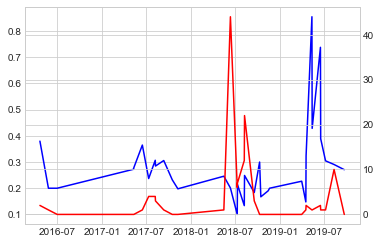

In [451]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(secchi.time, secchi["X75."], color="blue");

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx();

# Plot the relative temperature in red
ax2.plot(secchi.time, secchi.sum7neg_t6, color="red");

In [452]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [453]:
model = LinearRegression()
model.fit(secchi['sum7neg_t6'], secchi['X75.'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.  1.  0.  0.  0.  1.  4.  4.  3.  1.  0.  0.  1. 44.  6.  7. 12. 22.
  3.  0.  0.  0.  0.  0.  1.  2.  1.  1.  2.  1.  1. 10.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [454]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy as pt
import pymc3 as pm
import seaborn as sns

In [20]:
#pip install pymc3

Note: you may need to restart the kernel to use updated packages.Collecting fastprogress>=0.2.0

  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.0-py3-none-any.whl size=1530117 sha256=18b96567d1ec42e98d1ef58c8da82db9e6a0fff6bcd644618fd9337efba97d37
  Stored in directory: c:\users\benha\appdata\local\pip\cache\wheels\a7\58\0e\36103fd1d68c36b0ac1f62eac224a96a60189046faf6173400
Successfully built theano-pymc


In [455]:
sec[['secchi_75','average7_t']]

NameError: name 'sec' is not defined

In [37]:
df.to_csv('ha.csv',index=False)

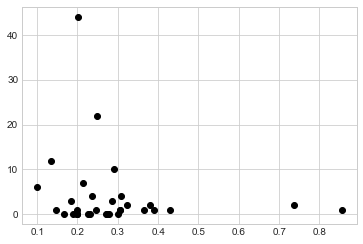

In [456]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np

plt.plot(secchi['X75.'], secchi['sum7neg_t6'], 'o', color='black')

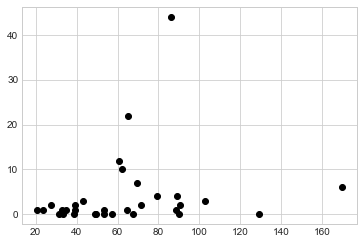

In [457]:
plt.plot(turbidity['X75.'], turbidity['sum7neg_t6'], 'o', color='black')

In [465]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

glm = PoissonRegressor()
gbdt = HistGradientBoostingRegressor(loss='poisson', learning_rate=.01)
glm.fit(secchi, y_train)
gbdt.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [411]:
plt.plot(turbidity['X75.'], turbidity['sum7_t'], 'o', color='black');

KeyError: 'sum7_t'

In [ ]:
def poisson(wq, x, y):
    
    temp = df[wq]
    
    # Model formula
    formula = f"{y} ~ {x}"
    
    # Use Patsy package to carve out the x and y matrices for the ZIP model 
    Y, X = dmatrices(formula, temp, return_type='dataframe')
    
    # Fit the model
    model_p = sm.GLM(Y, X, family=sm.families.Poisson()).fit() #Fit the model using maximum likelihood
    
    return model_p.summary()

#-----------------------------------------------------------------------

# Perform negative binomial
# following poisson results will feed into negative binomial
def poisson_for_nb(wq, x, y):
    
    temp = df[wq]
    
    # Model formula
    formula = f"{y} ~ {x}"
    
    # Use Patsy package to carve out the x and y matrices for the ZIP model 
    Y, X = dmatrices(formula, temp, return_type='dataframe')
    
    # Fit the model
    model_p = sm.GLM(Y, X, family=sm.families.Poisson()).fit() #Fit the model using maximum likelihood
    
    return model_p, Y, X, temp

def negative_binomial(wq, x, y):
    
    model_p, Y, X, temp = poisson_for_nb(wq, x, y)
    
    # Obtain rate vector from Poisson model
    temp2 = temp.copy()
    temp2['rate_lambda'] = model_p.mu
    
    # Auxiliary OLS regression to find α for the NB2 model
    # Calculate the dependent variable
    temp2['aux_ols_dependent'] = temp2.apply(lambda t: ((t[y] - t['rate_lambda'])**2 - t['rate_lambda']) / t['rate_lambda'], axis=1)
    
    # Using the α as dependent variable in an OLS regression model
    ols_formula = """aux_ols_dependent ~ rate_lambda - 1"""
    
    # Fitting the OLS regression model
    model_aux_olsr = smf.ols(ols_formula, temp2).fit()
    
    # The model coefficient is the alpha parameter for our negative binomial
    alpha = model_aux_olsr.params[0]
    
    # Get the associate t-value to determine significance
    t_value = model_aux_olsr.tvalues[0]
    
    # Caluclate degrees of freedom (number of observations - regression variables - dispersion variable)
    deg_freedom = len(temp2) - 1 - 1
    
    # Determine t critical value at 95% significance value
    t_critical = scipy.stats.t.ppf(q=1-.05,df=deg_freedom)
    
    # If the alpha is significant, negative binomial can be a better fit than poisson
    if (t_value > t_critical):
        alpha_sig = "Alpha parameter of negative binomial regression is significant"
    else:
        alpha_sig = "Alpha parameter of negative binomial regression is not significant"
        
    # Fit negative binomial regression model
    model_nb = sm.GLM(Y, X,family=sm.families.NegativeBinomial(alpha=alpha)).fit()
    
#     # Export model as img
#     plt.rc('figure', figsize=(7,3))
#     plt.text(0.01, 0.05, str(nb2_training_results.summary()),
#     {'fontsize':22}, fontproperties =  'monospace')
#     plt.axis('off')
#     plt.tight_layout()
#     plt.savefig(f'../../output/regression/{wq}_{y}_summary.png')
    
    return alpha_sig, model_nb.summary(), model_nb

#-------------------------------------------------------

# Perform zero inflated poisson regression (ZIP)
def zero_inflated_poisson(water_quality_parameter, alias, independent_var, dependent_var):
    
    display(alias)
    
    # Model formula
    formula = f"{dependent_var} ~ {independent_var}"
    
    # Use Patsy package to carve out the x and y matrices for the ZIP model 
    y, x = dmatrices(formula, water_quality_parameter, return_type='dataframe')
    
    # Fit the model
    model_zip = sm.ZeroInflatedPoisson(endog=y, exog=x, exog_infl=x, inflation='logit').fit(maxiter=500, method='bfgs') #Fit the model using maximum likelihood
    
    return model_zip.summary()
